In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
print('We have the following unique genders in the dataset', end=' ')
print(df['gender'].unique())
print('We have this parental level of education ', end=' ')
print(df['parental_level_of_education'].unique())
print('We have the following races in the dataset', end=' ')
print(df['race_ethnicity'].unique())
print('This students have the following categories in lunch', end=' ')
print(df['lunch'].unique())
print('We will see the test preparation course: ', end=' ')
print(df['test_preparation_course'].unique())

We have the following unique genders in the dataset ['female' 'male']
We have this parental level of education  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
We have the following races in the dataset ['group B' 'group C' 'group A' 'group D' 'group E']
This students have the following categories in lunch ['standard' 'free/reduced']
We will see the test preparation course:  ['none' 'completed']


In [23]:
num_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feat = [feature for feature in df.columns if df[feature].dtype == 'O']

print(num_feat)
print(cat_feat)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [26]:
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
reading =df[df['reading_score'] == 100]['average'].count()
writing = df[df['writing_score'] == 100]['average'].count()
math = df[df['math_score'] == 100]['average'].count()

print(f"The total number of best students in reading is [{reading}]")
print(f"The total number of best students in writing is [{writing}]")
print(f"We have [{math}] students with flawless scores in Math")

The total number of best students in reading is [17]
The total number of best students in writing is [14]
We have [7] students with flawless scores in Math


In [40]:
reading =df[df['reading_score'] <= 20]['average'].count()
writing = df[df['writing_score'] <= 20]['average'].count()
math = df[df['math_score'] <= 20]['average'].count()

print(f"The total number of worst students in reading is [{reading}]")
print(f"The total number of worst students in writing is [{writing}]")
print(f"We have [{math}] students with flawful lol scores in Math")

The total number of worst students in reading is [1]
The total number of worst students in writing is [3]
We have [4] students with flawful lol scores in Math


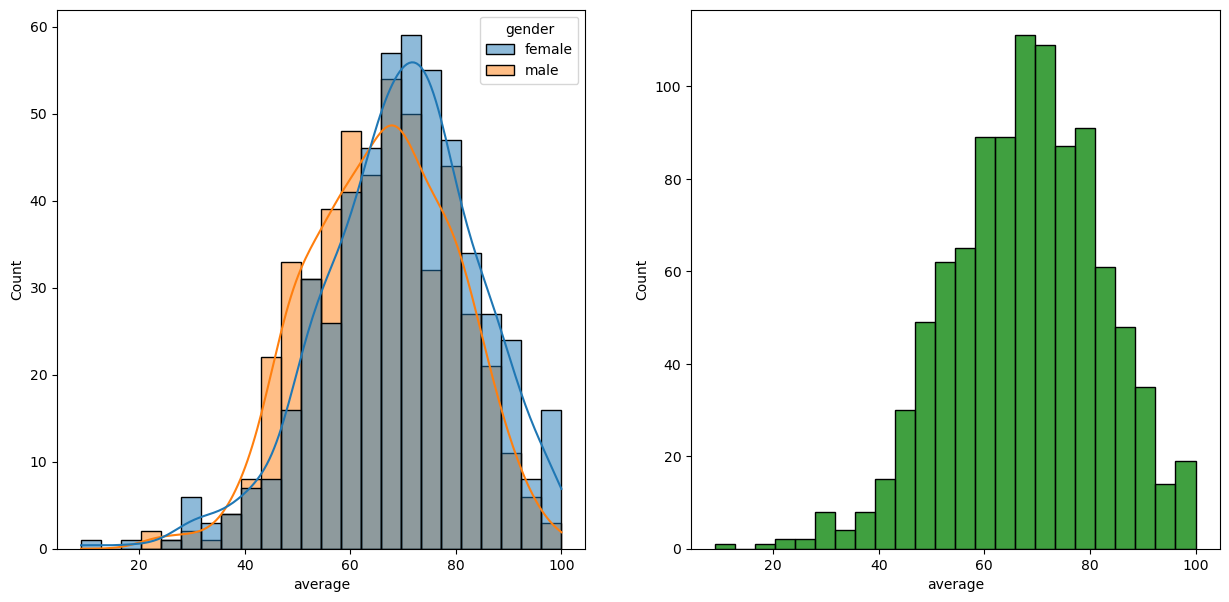

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', hue='gender', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='average', color='g')
plt.show()

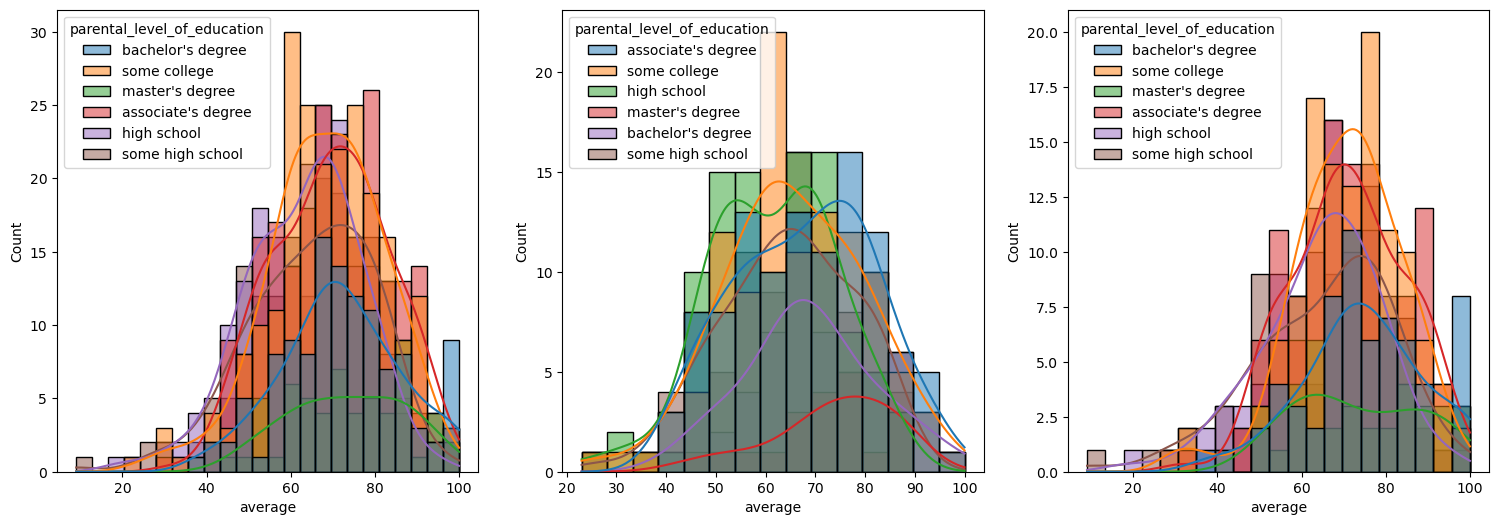

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

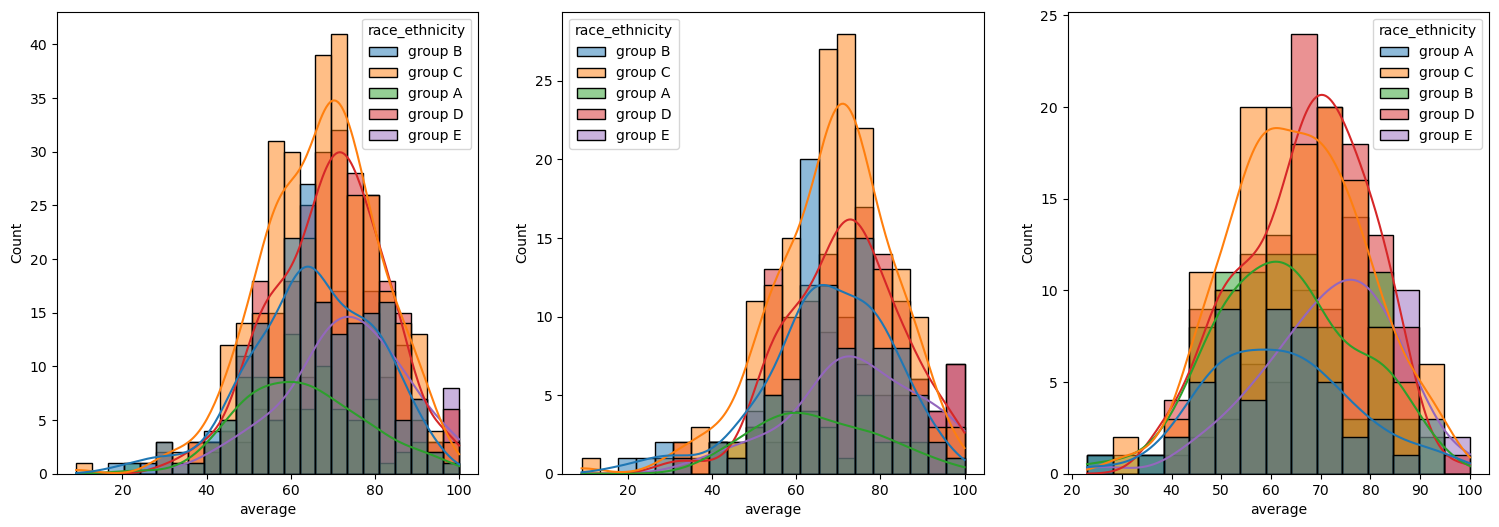

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

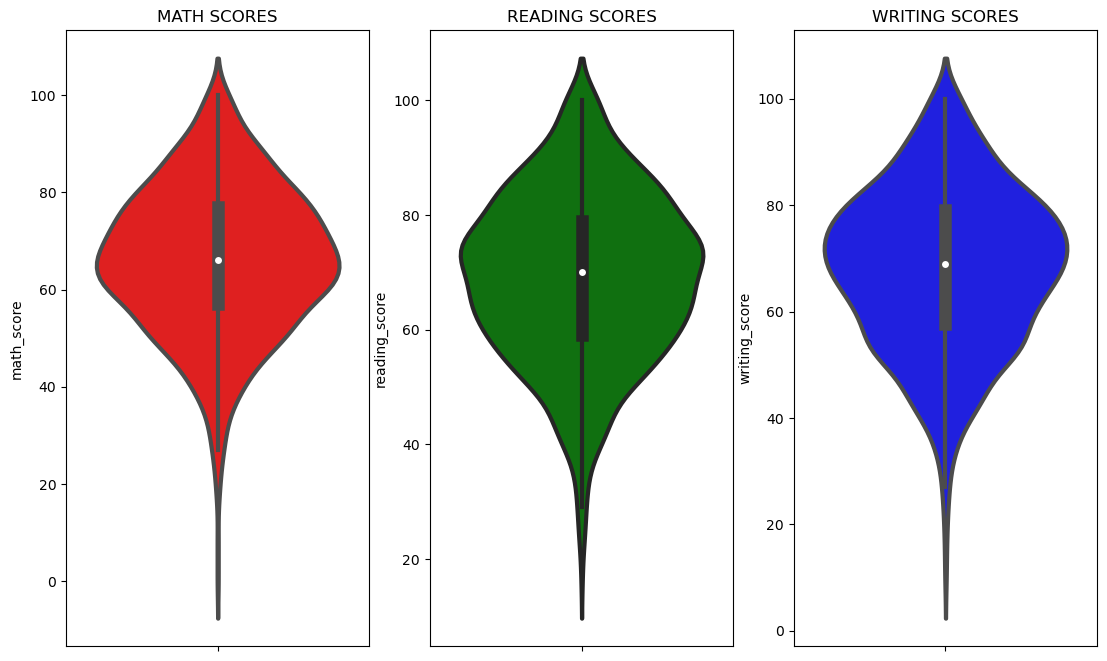

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()